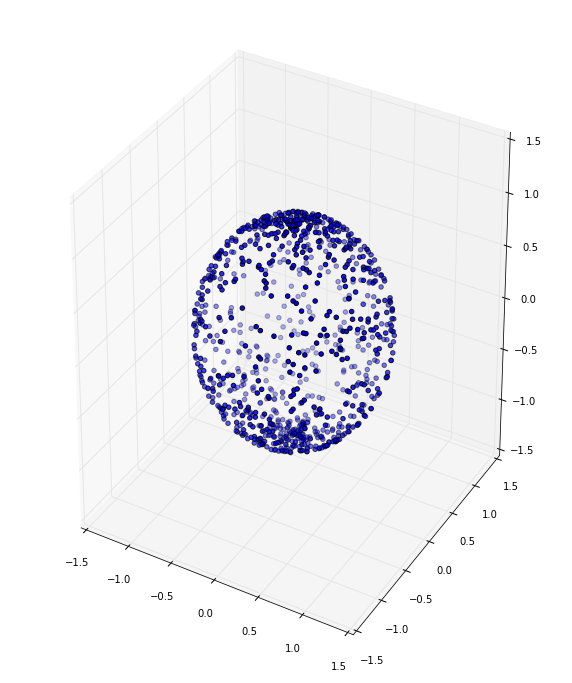

/Users/mich/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mich/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


D 1.0
get_K: 14.0405640602 sec
fourier_error 0.746223345208
D 2.0
get_K: 15.0952038765 sec
fourier_error 0.421541672152
D 4.0
get_K: 14.4929728508 sec
fourier_error 0.3693801916
D 8.0
get_K: 15.1844921112 sec
fourier_error 0.388952490899
D 16.0
get_K: 16.8105330467 sec
fourier_error 0.413303995552
D 32.0
get_K: 18.830657959 sec
fourier_error 0.427058069501
D 64.0
get_K: 26.867784977 sec
fourier_error

In [ ]:
% matplotlib inline

import numpy as np
from numpy import linalg, random, ones, zeros, matrix, eye, dot
from numpy.linalg import norm, cholesky, inv
from sklearn.cross_validation import train_test_split
import mosek
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
import time
import scipy
from collections import namedtuple

v = .00001
delta = 0.01
sigma = 1
initial_rho = 1
max_iter = 100
initial_step_size = .1
timer_thresh = .1
ep = .0001
points_count = 1000
points_std_from_surface = 0.0001
# D = 10000

def kernel(x1, x2):
    return math.exp(-1 * math.pow(norm(x1 - x2), 2
                                  ) / (2 * math.pow(sigma, 2)))

# def kernel_vect(x_list, x2):
#     return np.exp(-1 * np.power(norm(x_list - x2, axis=1), 2) / (2 * math.pow(sigma, 2)))

def z(x1,w,b):
#     w = random.normal(0, 1.0/sigma, size=(D,len(x1)))
#     b = random.uniform(0,2*np.pi,size=D)
    return math.sqrt(2.0/D) * np.cos(np.dot(w, x1) + b)

def get_K():
    start = time.time()

    w = random.normal(0, 1.0/sigma, size=(D*len(g_x)*len(g_x),len(g_x[0])))
    b = random.uniform(0,2*np.pi,size=D*len(g_x)*len(g_x))

    K = np.zeros((len(g_x), len(g_x)))
    temp_error = 0.0
    counter=0
    for i in range(len(g_x)):
#         K[i, :] = kernel_vect(g_x, g_x[i])
        for j in range(len(g_x)):
#             temp_error += abs(kernel(g_x[j], g_x[i]) - np.dot(z(g_x[j],w[counter,:],b[counter]),
#                                                               z(g_x[i],w[counter,:],b[counter])))
            temp_error += abs(kernel(g_x[j], g_x[i]) - np.dot(
                                                math.sqrt(2.0/D) * np.cos(np.dot(w[counter,:], g_x[i]) + b[counter]),
                                                math.sqrt(2.0/D) * np.cos(np.dot(w[counter,:], g_x[j]) + b[counter]))
                             )
            counter += 1
#             K[i, j] = kernel(g_x[j], g_x[i])
        
    fourier_error.append(temp_error/(len(g_x)**2))
        
    end = time.time()
    if end - start > timer_thresh:
        print 'get_K:', end - start, 'sec'
    return K

def get_data_points():
    start = time.time()
    points = random.random((points_count, 2)) * 2 * np.pi

    x = np.zeros((points_count, 3))
    for p in range(points_count):
        if points_std_from_surface > 0:
            r = random.normal(loc=1, scale=points_std_from_surface)
        else:
            r = 1
        z_cord = r * np.sin(points[p][1])

        r_temp = r * np.cos(points[p][1])
        y_cord = r_temp * np.sin(points[p][0])
        x_cord = r_temp * np.cos(points[p][0])

        x[p] = np.asarray([x_cord, y_cord, z_cord])

    end = time.time()
    if end - start > timer_thresh:
        print 'get_data_points:', end - start, 'sec'
    return x


g_x = get_data_points()

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(g_x[:, 0], g_x[:, 1], g_x[:, 2])
plt.show()

D=1.
fourier_error=[]
for i in range(14):
    print 'D',D
    g_K = get_K()
    print 'fourier_error',fourier_error[-1]
    D *= 2
print fourier_error

